In [73]:
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install opencv-python

In [74]:
import cv2
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential

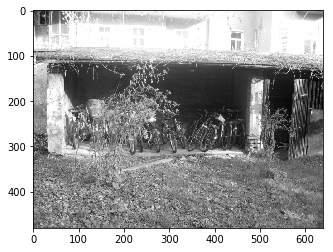

In [75]:
data_directory ="D:/OneDrive_2019-07-08/Object classification/train"
categories=["bike" , "cars" , "none" , "person"]
training_data=[]
IMG_SIZE = 200
for category in categories:
        path=os.path.join(data_directory,category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path, img ), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap= 'gray')
            plt.show()
            break
        break

In [76]:
def create_training_data():
    for category in categories:
        path=os.path.join(data_directory,category)
        class_num= categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path, img ), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, (IMG_SIZE , IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [77]:
print(len(training_data))

1399


In [78]:
import random
random.shuffle(training_data)

In [79]:
for sample in training_data[:10]:
    print(sample[1])

2
1
0
1
2
0
1
3
2
1


In [80]:
x=[]
y=[]

In [83]:
for features, label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(len(x),1, IMG_SIZE, IMG_SIZE)

In [84]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()
 
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [85]:

pickle_in=open("y.pickle","rb")
pickle.load(pickle_in)
x=x/255.0
x.shape
y=np_utils.to_categorical(y,4)

In [86]:
model=Sequential()
 
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(1,200,200),data_format='channels_first'))
 
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
 
model.add(Dense(300,activation='relu'))
 
model.add(Dropout(0.2))
 
model.add(Dense(100,activation='relu'))
 
model.add(Dense(4,activation='softmax'))
 
#help(model.compile)
 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x,y,batch_size = 4,epochs=5,verbose=1)

Epoch 1/5
1399/1399 [==============================] - 1299s 929ms/step - loss: 11.5511 - acc: 0.2802
Epoch 2/5
1399/1399 [==============================] - 371s 265ms/step - loss: 1.6756 - acc: 0.3846
Epoch 3/5
1399/1399 [==============================] - 363s 260ms/step - loss: 0.8215 - acc: 0.6783
Epoch 4/5
1399/1399 [==============================] - 364s 260ms/step - loss: 0.2162 - acc: 0.9299
Epoch 5/5
1399/1399 [==============================] - 374s 267ms/step - loss: 0.0513 - acc: 0.9878


[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


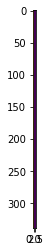

In [90]:
data ="D:/OneDrive_2019-07-08/Object classification/private_scoring"
#categories=["bike" , "cars" , "none" , "person"]
test_data=[]
IMG_SIZE = 200
path=os.path.join(data_directory,category)
COUNT=0
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path, img ), cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array, (IMG_SIZE , IMG_SIZE))
    test_data.append(new_array)
test_data=np.array(test_data).reshape(len(test_data),1, IMG_SIZE, IMG_SIZE)  
prediction=model.predict(test_data)
print(prediction)
plt.imshow(prediction)
    
    
        
        